IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Mélissa Lacour & Céline Fan

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [49]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import random
%matplotlib inline

import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# Importation de la librairie pickle
import pickle as pkl

%load_ext autoreload
%autoreload 2

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)


# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2','x3', 'x4', 'x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [32]:
data5D[0:5]

,x1,x2,x3,x4,x5,label
0,-0.472352,-0.035994,0.572799,2.017446,-1.865967,-1
1,1.993913,0.984667,-1.180237,1.460067,-0.195743,-1
2,0.923188,1.194008,0.065319,0.909784,0.832256,-1
3,2.540148,-0.427836,-0.113014,3.257095,-1.689755,-1
4,4.331413,0.590868,-1.105335,4.475987,-1.790176,-1


In [33]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [34]:
X5D[0:5]

array([[-0.4723522 , -0.03599385,  0.57279854,  2.01744639, -1.86596742],
       [ 1.9939134 ,  0.9846668 , -1.18023654,  1.46006741, -0.19574327],
       [ 0.92318832,  1.19400787,  0.06531872,  0.90978449,  0.83225595],
       [ 2.54014784, -0.42783646, -0.11301444,  3.2570952 , -1.68975456],
       [ 4.33141251,  0.59086794, -1.10533473,  4.47598742, -1.79017634]])

In [11]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [35]:
Y5D[0:5]

array([-1., -1., -1., -1., -1.])

Voici la classe abstraite Classifier:

In [12]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        cpt_ok = 0
        for i in range (0, len(desc_set)):
            if (self.predict(desc_set[i]) == label_set[i]):
                cpt_ok += 1
        
        return cpt_ok/len(label_set)

## Etude de la classe ClassifierKNN:

In [13]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    # ATTENTION : il faut compléter cette classe avant de l'utiliser !
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.k = k
        
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        #liste contenant la distance entre x et toutes les valeurs de desc_set
        dist = np.linalg.norm(self.desc_set - x, axis=1)
        
        #liste contenant la liste des arguments de dist trié par ordre croissant
        arg_dist = np.argsort(dist)
        
        #nombre de label == 1
        score = np.sum(self.label_set[arg_dist[:self.k]] == 1)
        
        return 2 * (score/self.k -.5)

    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        if (self.score(x) < 0):
            return -1
        else:
            return 1
    

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set = desc_set
        self.label_set = label_set
        

### Tests du k optimal pour le classifier ClassifierKNN sur une base de test 2D:

argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.

pour k = 1on a le plus grand accuracy qui est de 1.0


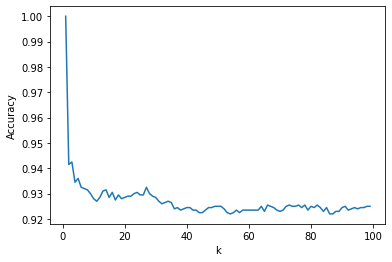

In [19]:
tab_accuracy = []
max_k = 0
max_acc = 0

for k in range(1,100):
    un_KNN = ClassifierKNN(2, k)
    un_KNN.train(X2D,Y2D) 
    acc = un_KNN.accuracy(X2D,Y2D)
    tab_accuracy.append(acc)
    if acc > max_acc:
        max_acc = acc
        max_k = k

print("pour k = " + str(max_k) + " on a le plus grand accuracy qui est de "+ str(max_acc))

# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,100),tab_accuracy)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

In [ ]:
analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.

### Recherche du k optimal pour le classifier ClassifierKNN sur une base de test 5D:

pour k = 1 on a le plus grand accuracy qui est de 1.0


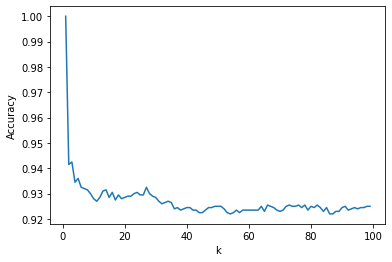

In [54]:
tab_accuracy = []
max_k = 0
max_acc = 0

for k in range(1,100):
    un_KNN = ClassifierKNN(5, k)
    un_KNN.train(X2D,Y2D) 
    acc = un_KNN.accuracy(X2D,Y2D)
    tab_accuracy.append(acc)
    if acc > max_acc:
        max_acc = acc
        max_k = k

print("pour k = " + str(max_k) + " on a le plus grand accuracy qui est de "+ str(max_acc))

# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,100),tab_accuracy)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

### Evolution de l'accuracy au cours de l'apprentissage pour le classifier ClassifierKNN sur une base de test 2D:

In [55]:
# Apprentissage pas à pas du perceptron et mémorisation de l'accuracy à chaque étape:
# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:

(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,1000,1000)

un_KNN = ClassifierKNN(2, 1)
train_acc = []
test_acc = []

# Réalisation de N itérations
N = 100
for i in range(N):
    un_KNN.train(train_desc, train_label)
    train_acc.append(un_KNN.accuracy(train_desc, train_label))
    test_acc.append(un_KNN.accuracy(test_desc, test_label))
# -----
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()

# -----
# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
ut.plot_frontiere(X2D,Y2D,un_KNN,step=150)
ut.plot2DSet(X2D,Y2D)

print("Accuracy finale (train): ",  un_KNN.accuracy(train_desc, train_label))
print("Accuracy finale (test) : ", un_KNN.accuracy(test_desc, test_label))

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
np.random.seed(42)   # on prend 42 comme graine

un_KNN = ClassifierKNN(2, 1)
train_acc = []
test_acc = []

# Paramètres pour le perceptron:
dim = X2D.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

nb_iter = 10
perf = []

# 1) mélanger des exemples
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

# 2) réaliser une validation croisée complète 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, nb_iter, i)
    un_KNN = ClassifierKNN(2, 1)
    un_KNN.train(Xapp, Yapp)
    bc = un_KNN.accuracy(Xtest, Ytest)
    perf.append(bc)
    print("Iteration " + str(i) + " : taille base app.= " + str(len(Xapp)) + " taille base test= " + str(len(Xtest)) + " Taux de bonne classif: " + str(bc))

# ------------------------ 
    
print("Perf obtenues : ",perf)